In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import time

In [28]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Bidirectional
from tensorflow.keras.callbacks import TensorBoard

In [3]:
data = pd.read_csv("pedestrian.csv")

In [4]:
data.head()

,Date,Hour,State Library,Collins Place (South),Collins Place (North),Flagstaff Station,Melbourne Central,Town Hall (West),Bourke Street Mall (North),Bourke Street Mall (South),...,Queen Street (West),Lygon Street (East),Flinders St-Swanston St (West),Spring St-Lonsdale St (South),City Square,St. Kilda-Alexandra Gardens,Grattan St-Swanston St (West),Monash Rd-Swanston St (West),Tin Alley-Swanston St (West),Southbank
0,01/01/2016,0:00:00,1535,0,409,785,2829,3044,461,883,...,613,175,3681,582,2536,0,36,15,16,NaN
1,01/01/2016,1:00:00,1442,0,200,313,2905,2908,430,597,...,436,92,4511,129,2606,0,37,36,30,NaN
2,01/01/2016,2:00:00,747,0,96,116,1733,2036,195,294,...,314,49,4311,66,2200,0,11,7,11,NaN
3,01/01/2016,3:00:00,352,0,48,85,1214,1162,161,183,...,244,42,3638,39,1437,0,15,3,1,NaN
4,01/01/2016,4:00:00,109,0,12,40,357,657,90,118,...,66,23,2604,30,448,0,10,7,4,NaN


In [5]:
data.shape

(17544, 45)

In [6]:
df = data.iloc[:,0:3]
df.head(50)

,Date,Hour,State Library
0,01/01/2016,0:00:00,1535
1,01/01/2016,1:00:00,1442
2,01/01/2016,2:00:00,747
3,01/01/2016,3:00:00,352
4,01/01/2016,4:00:00,109
5,01/01/2016,5:00:00,65
6,01/01/2016,6:00:00,52
7,01/01/2016,7:00:00,67
8,01/01/2016,8:00:00,73
9,01/01/2016,9:00:00,142


In [7]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
df["Hour"] = pd.to_timedelta(df["Hour"])
df["Date"] = df['Date'] + df['Hour']
df = df.drop(columns=['Hour'])
df = df.set_index(['Date'])
df.head(30)

,State Library
Date,
2016-01-01 00:00:00,1535
2016-01-01 01:00:00,1442
2016-01-01 02:00:00,747
2016-01-01 03:00:00,352
2016-01-01 04:00:00,109
2016-01-01 05:00:00,65
2016-01-01 06:00:00,52
2016-01-01 07:00:00,67
2016-01-01 08:00:00,73


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


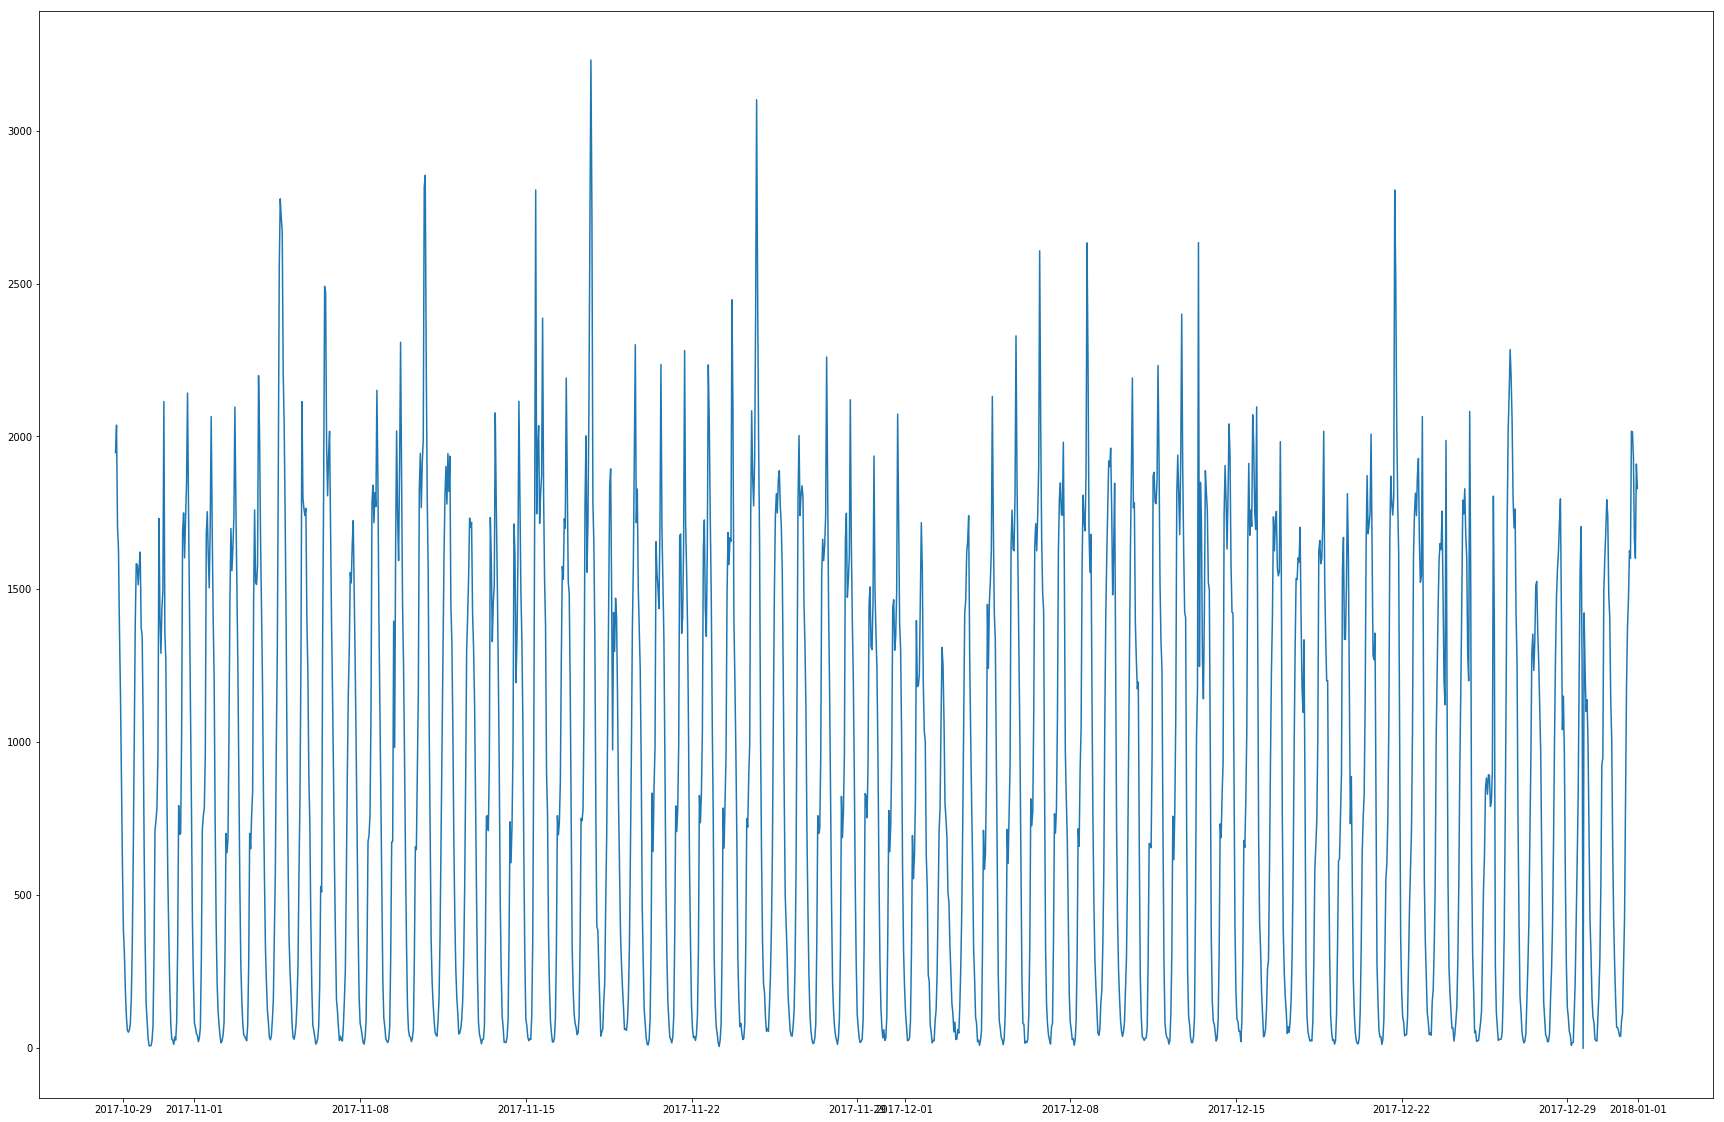

In [8]:
plt.figure(figsize=(30,20))
plt.plot(df.iloc[16000:])
plt.show()

In [9]:
data_train = df.iloc[0:16000,:]
data_test = df.iloc[16000:,:]

In [10]:
data_train.head()

,State Library
Date,
2016-01-01 00:00:00,1535
2016-01-01 01:00:00,1442
2016-01-01 02:00:00,747
2016-01-01 03:00:00,352
2016-01-01 04:00:00,109


In [11]:
def scale_data(dataset):
    scaler = MinMaxScaler(feature_range=(0, 1))
    training_scaled = scaler.fit_transform(dataset)
    return training_scaled

def build_X(training_scaled):
    X_train = []
    lookback = 60

    for i in range(lookback, len(training_scaled)):
        X_train.append(training_scaled[i-lookback:i,0])   
        
    X_train = np.array(X_train)
    return X_train

def build_Y(training_scaled):
    Y_train = []
    lookback = 60

    for i in range(lookback, len(training_scaled)):
        Y_train.append(training_scaled[i,0])
        
    Y_train = np.array(Y_train)
    return Y_train

In [12]:
X_train = build_X(scale_data(data_train))
Y_train = build_Y(scale_data(data_train))

In [13]:
X_train

array([[0.29262717, 0.27490951, 0.14250333, ..., 0.04457992, 0.07582397,
        0.13316822],
       [0.27490951, 0.14250333, 0.0672509 , ..., 0.07582397, 0.13316822,
        0.20213374],
       [0.14250333, 0.0672509 , 0.02095637, ..., 0.13316822, 0.20213374,
        0.25204801],
       ...,
       [0.01352639, 0.00552486, 0.00514384, ..., 0.12173747, 0.17431892,
        0.25414365],
       [0.00552486, 0.00514384, 0.00342922, ..., 0.17431892, 0.25414365,
        0.33930272],
       [0.00514384, 0.00342922, 0.00647742, ..., 0.25414365, 0.33930272,
        0.35663936]])

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

In [31]:
lookback = 30
epochs = 5
batch_size = 64

model = Sequential()
model.add(Bidirectional(LSTM(batch_size, input_shape=(lookback,1), return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(batch_size, input_shape=(lookback,1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(batch_size, input_shape=(lookback,1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[tensorboard], validation_split=0.2)

Train on 12752 samples, validate on 3188 samples
Epoch 1/5
12752/12752 [==============================] - 60s 5ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 2/5
12752/12752 [==============================] - 59s 5ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/5
12752/12752 [==============================] - 60s 5ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 4/5
12752/12752 [==============================] - 57s 4ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 5/5
12752/12752 [==============================] - 56s 4ms/step - loss: 0.0019 - val_loss: 0.0016


dict_keys(['val_loss', 'loss'])


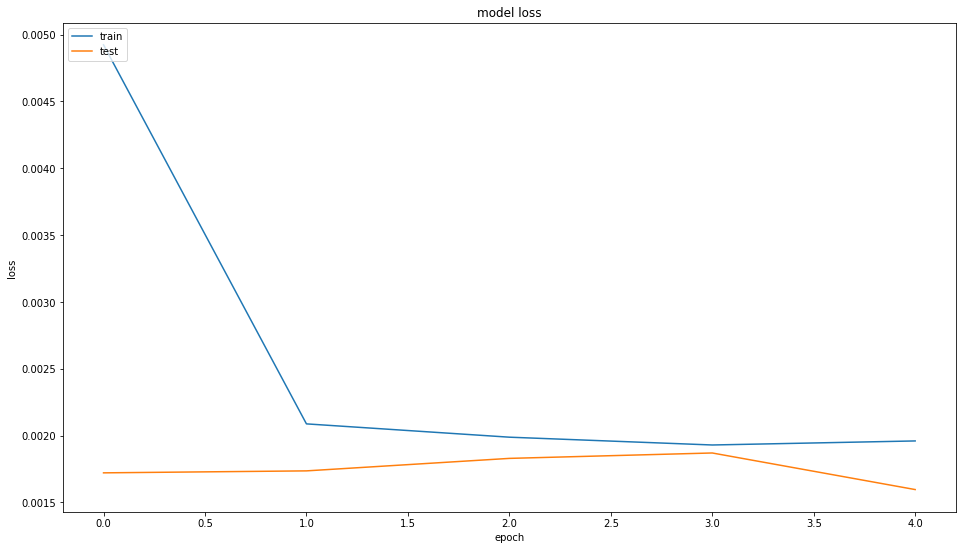

In [32]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
data_test = df.iloc[16000:,:]
# make predictions
sc = MinMaxScaler(feature_range = (0,1))
X_test = sc.fit_transform(data_test)

In [34]:
X_test = build_X(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
test_predict = model.predict(X_test)
test_predict = sc.inverse_transform(test_predict)

data_test.reset_index(level=0, inplace=True)
pd.DataFrame(test_predict)

,0
0,37.123871
1,98.680702
2,164.791718
3,251.623932
4,413.308960
5,708.358154
6,891.488159
7,990.172607
8,1144.110962
9,1485.698730


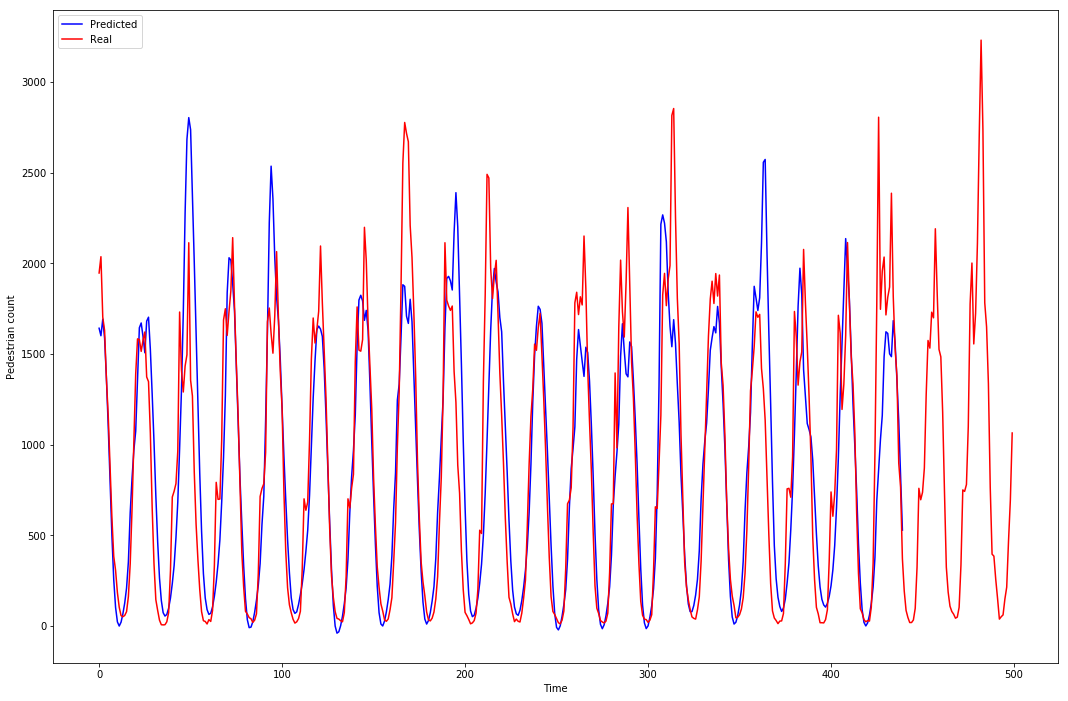

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

start = 0
end = 500

plt.figure(figsize=(18,12))
plt.plot(test_predict[start+60:end] , color = 'blue', label='Predicted')
plt.plot(data_test.iloc[start:end,1], color = 'red', label='Real')
plt.xlabel('Time')
plt.ylabel('Pedestrian count')
plt.legend()
plt.show()